### 1- Coleta de dados

In [1]:
#importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
#Informações a respeito do número de linhas e colunas
print(f'Número de observações do dataset: {df.shape[0]}\nNúmero de features: {df.shape[1]}') 

Número de observações do dataset: 1000
Número de features: 8


### 2- Pré processamento dos dados

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)

**Verificando se há dados ausentes**

In [4]:
print('existem valores ausentes?',df.isnull().values.any())

existem valores ausentes? False


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Verificando se há outliers nas notas**

In [26]:
#Menor e maior nota possível, respectivamente, são 0 e 100
#notas de Math
print('math score > 100 ou math score < 0 - ',((df['math score'] > 100) | (df['math score'] < 0)).any())
outlier_math_score = df[df['math score'] > 100]
print('Outliear data:\n', outlier_math_score['math score'].head())
df = df.drop(df[((df['math score'] > 100) | (df['math score'] < 0))].index)
print('math score > 100 ou math score < 0 - ',((df['math score'] > 100) | (df['math score'] < 0)).any())
#notas de reading
print('reading score > 100 ou reading score < 0 - ',((df['reading score'] > 100) | (df['reading score'] < 0)).any())
outlier_reading_score = df[df['reading score'] > 100]
print('Outliear data:\n', outlier_reading_score['reading score'].head())
df = df.drop(df[((df['reading score'] > 100) | (df['reading score'] < 0))].index)
print('reading score > 100 ou reading score < 0 - ',((df['reading score'] > 100) | (df['reading score'] < 0)).any())
#notas de writing
print('writing score > 100 ou writing score < 0 - ',((df['writing score'] > 100) | (df['writing score'] < 0)).any())
outlier_writing_score = df[df['writing score'] > 100]
print('Outliear data:\n', outlier_writing_score['writing score'].head())
df = df.drop(df[((df['writing score'] > 100) | (df['writing score'] < 0))].index)
print('writing score > 100 ou writing score < 0 - ',((df['writing score'] > 100) | (df['writing score'] < 0)).any())


math score > 100 ou math score < 0 -  False
Outliear data:
 Series([], Name: math score, dtype: int64)
math score > 100 ou math score < 0 -  False
reading score > 100 ou reading score < 0 -  False
Outliear data:
 Series([], Name: reading score, dtype: int64)
reading score > 100 ou reading score < 0 -  False
writing score > 100 ou writing score < 0 -  False
Outliear data:
 Series([], Name: writing score, dtype: int64)
writing score > 100 ou writing score < 0 -  False


**Mudando o tipo dos dados**

In [ ]:
df['gender'] = df['gender'].astype('category')
df['race/ethnicity'] = df['race/ethnicity'].astype('category')
df['lunch'] = df['lunch'].astype('category')
df['parental level of education'] = df['parental level of education'].astype('category')
df['test preparation course'] = df['test preparation course'].astype('category')

df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.2 KB


**Adicionando mais uma coluna: conceito final.**   
Relação obtida a partir da média dos conceitos das três notas:   
1) média $\geq$ 90 $\rightarrow$ conceito 'A'    
2) 80 $\leq$ média $<$ 90 $\rightarrow$ conceito 'B'    
3) 70 $\leq$ média $<$ 80 $\rightarrow$ conceito 'C'    
4) 60 $\leq$ média $<$ 70 $\rightarrow$ conceito 'D'    
5) média $\leq$ 60 $\rightarrow$ conceito 'F'    

In [ ]:
df['final grade'] = 'nan'

df.loc[(df.mean(axis=1) >= 90), 'final grade'] = 'A' 
df.loc[(df.mean(axis=1) >= 80) & (df.mean(axis=1) < 90), 'final grade'] = 'B' 
df.loc[(df.mean(axis=1) >= 70) & (df.mean(axis=1) < 80), 'final grade'] = 'C' 
df.loc[(df.mean(axis=1) >= 60) & (df.mean(axis=1) < 70), 'final grade'] = 'D' 
df.loc[(df.mean(axis=1) >= 0)  & (df.mean(axis=1) < 60), 'final grade'] = 'F' 

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final grade
0,female,group B,bachelor's degree,standard,none,72,72,74,C
1,female,group C,some college,standard,completed,69,90,88,B
2,female,group B,master's degree,standard,none,90,95,93,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,C


Separando por sexo:

In [ ]:
female_idx = df[df['gender']=='female'].index
male_idx = df[df['gender']=='male'].index
male_df = df.loc[male_idx]
female_df = df.loc[female_idx]

len(male_df), len(female_df)

(482, 518)

### Visualização Preliminar dos dados

**Estatística dos dados**

In [ ]:
df[['math score', 'reading score', 'writing score']].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


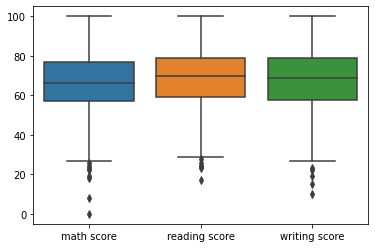

In [ ]:
sns.boxplot(data=df);

**Visualizando as distribuições e relacões dos dados**

**Relação das notas com os alunos**

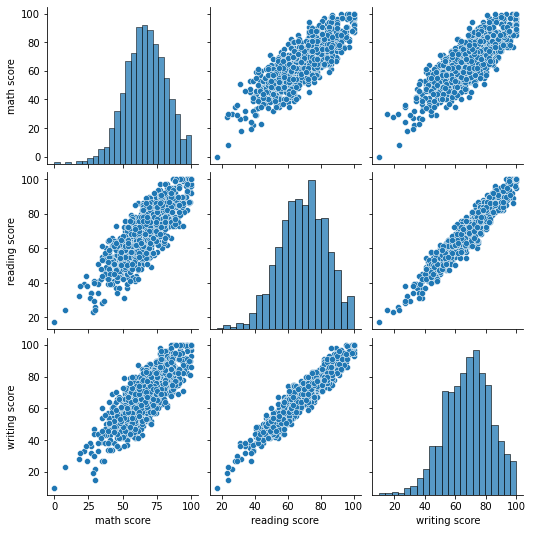

In [ ]:
sns.pairplot(df);

**Observações**: os dados apresentam um assimetria para esquerda, assimetria negativa. 
Solução: Uma possível forma de tratar dados assimétricos é por meio de transformações, nesse caso uma transformação do tipo square, $x^2$.      

Exemplo de como a transformação square atual na distribuição dos dados onde existe assimetria negativa.

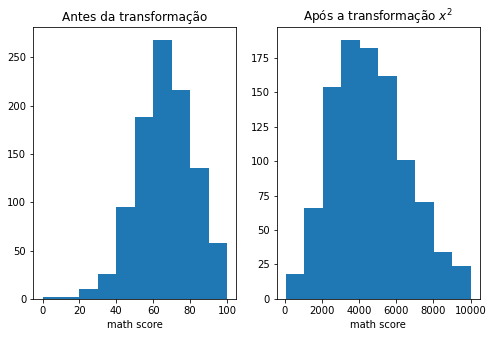

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df['math score'].hist(), plt.grid(False)
plt.title('Antes da transformação'), plt.xlabel('math score');

plt.subplot(1,2,2)
plt.title('Após a transformação $x^2$')
log_map = df['math score'].apply(np.square)
log_map[log_map > 0].hist(), plt.grid(False)
plt.xlabel('math score');

Olhando numericamente: Correlação

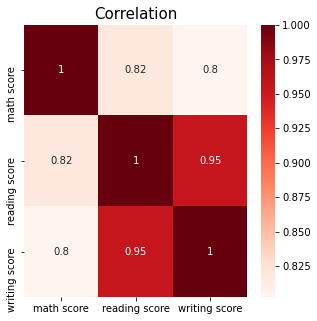

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation', fontsize=15);

**Observação**: As notas apresentação correlação alta ($>$ 0,5) e positiva, ou seja, alunos tendem a ter boas notas em ambas as disciplinas. Além disso, alunos com boa escrita apresentam boa leitura, diminuindo o analfabetismo funcional.

Breve comparativo do conceito final dos alunos:

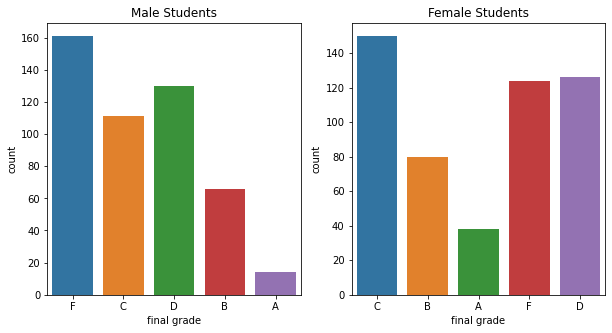

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1), plt.title('Male Students')
sns.countplot(x = male_df['final grade'], data = male_df)

plt.subplot(1,2,2), plt.title('Female Students')
sns.countplot(x = female_df['final grade'], data = female_df);


## Análise dos alunos do sexo masculino

**Relação dos alunos do sexo masculino com as notas**

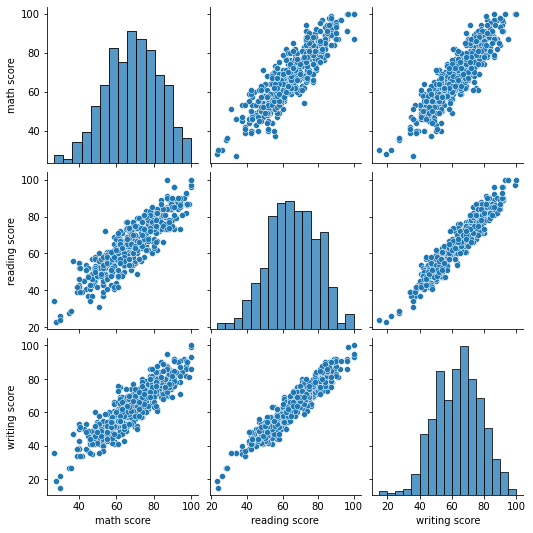

In [ ]:
sns.pairplot(male_df);

**Relação do nível de escolaridade dos pais com a notas dos alunos do sexo masculino**

In [ ]:
male_df.groupby('parental level of education').describe().loc[:,(slice(None),['count','mean', 'min','max'])]

math score                         reading score  \
                                 count       mean   min    max         count   
parental level of education                                                    
associate's degree               106.0  70.764151  40.0  100.0         106.0   
bachelor's degree                 55.0  70.581818  37.0  100.0          55.0   
high school                      102.0  64.705882  27.0   94.0         102.0   
master's degree                   23.0  74.826087  46.0   95.0          23.0   
some college                     108.0  69.009259  28.0  100.0         108.0   
some high school                  88.0  67.840909  30.0   94.0          88.0   

                                                    writing score             \
                                  mean   min    max         count       mean   
parental level of education                                                    
associate's degree           67.433962  37.0  100.0         106.0  65.405660   
bachelor's degree            68.090909  42.0  100.0          55.0  67.654545   
high school                  61.480392  24.0   91.0         102.0  58.539216   
master's degree              73.130435  42.0   89.0          23.0  72.608696   
some college                 64.990741  23.0   97.0         108.0  63.148148   
some high school             64.693182  26.0   88.0          88.0  61.375000   

                                          
                              min    max  
parental level of education               
associate's degree           35.0   95.0  
bachelor's degree            38.0  100.0  
high school                  15.0   86.0  
master's degree              46.0   90.0  
some college                 19.0   99.0  
some high school             22.0   87.0

**Observações:** os alunos do sexo masculino cujos os pais tinham como formação Master's degree obtiveram as maiores médias nas 3 disciplinas. Por outro lado, os alunos cujos pais tinham high school obtiveram as menores médias.

**Relação do tipo de alimentação com a notas dos alunos do sexo masculino**

In [ ]:
male_df.groupby('lunch').describe().loc[:,(slice(None),['count','mean', 'min','max'])]

math score                         reading score             \
                  count       mean   min    max         count       mean   
lunch                                                                      
free/reduced      166.0  62.457831  27.0  100.0         166.0  61.542169   
standard          316.0  72.022152  30.0  100.0         316.0  67.537975   

                          writing score                          
               min    max         count       mean   min    max  
lunch                                                            
free/reduced  23.0  100.0         166.0  59.126506  15.0   93.0  
standard      26.0  100.0         316.0  65.509494  22.0  100.0

**Observações:** os alunos com o tipo de alimenção standard obtiveram uma média superior aos alunos com a alimentação free/reduced 

**Relação raça/etnia com a notas dos alunos do sexo masculino**

In [ ]:
male_df.groupby('race/ethnicity').describe().loc[:,(slice(None),['count','mean', 'min','max'])]

math score                         reading score             \
                    count       mean   min    max         count       mean   
race/ethnicity                                                               
group A              53.0  63.735849  28.0  100.0          53.0  61.735849   
group B              86.0  65.930233  30.0   94.0          86.0  62.848837   
group C             139.0  67.611511  27.0   98.0         139.0  65.424460   
group D             133.0  69.413534  39.0  100.0         133.0  66.135338   
group E              71.0  76.746479  30.0  100.0          71.0  70.295775   

                            writing score                          
                 min    max         count       mean   min    max  
race/ethnicity                                                     
group A         23.0   96.0          53.0  59.150943  19.0   92.0  
group B         24.0   96.0          86.0  60.220930  15.0   92.0  
group C         28.0  100.0         139.0  62.712230  27.0   95.0  
group D         34.0   97.0         133.0  65.413534  34.0   99.0  
group E         26.0  100.0          71.0  67.394366  22.0  100.0

**Observações:** os alunos os quais as raças eram do grupo E se sairam melhores nas 3 disciplinas quando comparado as demais raças

## Análise dos alunos do sexo feminino

**Relação dos alunos do sexo feminino com as notas**

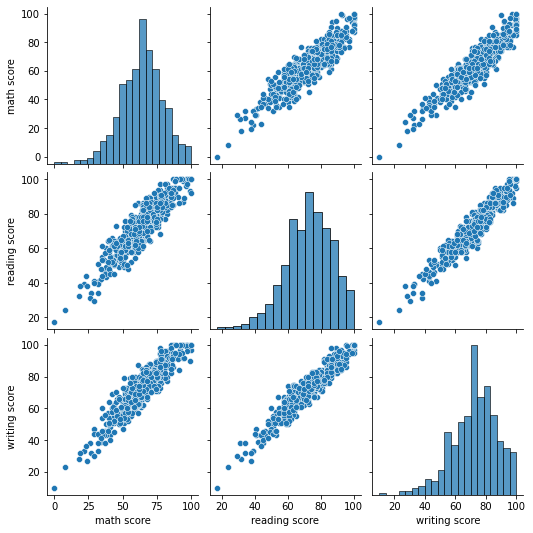

In [ ]:
sns.pairplot(female_df);

**Relação do nível de escolaridade dos pais com a notas dos alunos do sexo feminino**

In [ ]:
female_df.groupby('parental level of education').describe().loc[:,(slice(None),['count','mean', 'min','max'])]

math score                         reading score  \
                                 count       mean   min    max         count   
parental level of education                                                    
associate's degree               116.0  65.250000  26.0  100.0         116.0   
bachelor's degree                 63.0  68.349206  29.0  100.0          63.0   
high school                       94.0  59.351064   8.0   99.0          94.0   
master's degree                   36.0  66.500000  40.0   94.0          36.0   
some college                     118.0  65.406780  19.0  100.0         118.0   
some high school                  91.0  59.296703   0.0   97.0          91.0   

                                                    writing score             \
                                  mean   min    max         count       mean   
parental level of education                                                    
associate's degree           74.120690  31.0  100.0         116.0  74.000000   
bachelor's degree            77.285714  41.0  100.0          63.0  78.380952   
high school                  68.202128  24.0   99.0          94.0  66.691489   
master's degree              76.805556  53.0  100.0          36.0  77.638889   
some college                 73.550847  38.0  100.0         118.0  74.050847   
some high school             69.109890  17.0  100.0          91.0  68.285714   

                                          
                              min    max  
parental level of education               
associate's degree           38.0  100.0  
bachelor's degree            38.0  100.0  
high school                  23.0  100.0  
master's degree              54.0  100.0  
some college                 32.0   99.0  
some high school             10.0  100.0

**Observações:** diferentemente no que ocorreu no sexo masculino, os alunos do sexo feminino cujos pais tinha como graduação o bachelor's degree tiveram uma média maior nas três disciplinas quando comparado com as demais formações

**Relação do tipo de alimentação com a notas dos alunos do sexo feminino**

In [ ]:
female_df.groupby('lunch').describe().loc[:,(slice(None),['count','mean', 'min','max'])]

math score                         reading score             \
                  count       mean   min    max         count       mean   
lunch                                                                      
free/reduced      189.0  55.814815   0.0   93.0         189.0  67.386243   
standard          329.0  68.124620  19.0  100.0         329.0  75.607903   

                          writing score                          
               min    max         count       mean   min    max  
lunch                                                            
free/reduced  17.0  100.0         189.0  66.444444  10.0  100.0  
standard      29.0  100.0         329.0  75.927052  30.0  100.0

**Observações:** os alunos do sexo feminino cuja alimentção era do tipo standard tem uma maior probabilidade de ter uma nota boa quando comparado ao modelo free/reduced

**Relação raça/etnia com a notas dos alunos do sexo feminino**

In [ ]:
female_df.groupby('race/ethnicity').describe().loc[:,(slice(None),['count','mean', 'min','max'])]

math score                         reading score             \
                    count       mean   min    max         count       mean   
race/ethnicity                                                               
group A              36.0  58.527778  34.0   92.0          36.0  69.000000   
group B             104.0  61.403846   8.0   97.0         104.0  71.076923   
group C             180.0  62.033333   0.0   96.0         180.0  71.944444   
group D             129.0  65.248062  26.0   98.0         129.0  74.046512   
group E              69.0  70.811594  32.0  100.0          69.0  75.840580   

                            writing score                          
                 min    max         count       mean   min    max  
race/ethnicity                                                     
group A         43.0  100.0          36.0  67.861111  41.0   97.0  
group B         24.0   97.0         104.0  70.048077  23.0   96.0  
group C         17.0  100.0         180.0  71.777778  10.0  100.0  
group D         31.0  100.0         129.0  75.023256  32.0  100.0  
group E         34.0  100.0          69.0  75.536232  38.0  100.0

**Observações:** os alunos do sexo feminino cuja raça é do grupo E tem uma maior chance de ter uma nota superior a média das demais raças

### ANALISES DOS DADOS OBTIDOS

comparação das médias em Math dos alunos do sexo masculino e feminino

In [8]:
df_genero = df[['gender','math score']].groupby('gender').mean()
display(df_genero)

,math score
gender,
female,63.633205
male,68.728216


**Observações:** a média dos alunos do sexo masculino foram superiores

comparação das médias em Math dos alunos em relação a graduação dos pais

In [9]:
df_parental = df[['parental level of education','math score']].groupby('parental level of education').mean()
display(df_parental)

,math score
parental level of education,
associate's degree,67.882883
bachelor's degree,69.389831
high school,62.137755
master's degree,69.745763
some college,67.128319
some high school,63.497207


**Oberservação:** Nota-se também uma relação no desempenho dos alunos com a graduação dos pais. ConcluIndo que os filhos cujos pais têm master's degree, obtitiveram as maiores médias

Comparando as maiores e menores notas em relação a formação dos pais

In [10]:
df_parental2 = df[['parental level of education','math score']].groupby('parental level of education').min()
display(df_parental2)
df_parental22 = df[['parental level of education','math score']].groupby('parental level of education').max()
display(df_parental22)

,math score
parental level of education,
associate's degree,26
bachelor's degree,29
high school,8
master's degree,40
some college,19
some high school,0


,math score
parental level of education,
associate's degree,100
bachelor's degree,100
high school,99
master's degree,95
some college,100
some high school,97


**Observação:** Analisando as maiores e menores notas em relação a formação dos pais, foi revelado que a menor e a maior nota, respectivamente, foram de alunos que os pais tinham a formação some high school e bachelor's degree